# Analisando a verticalização de uma região pelo IPTU 

Neste NoteBook vamos demonstrar como extrair informações de relavência para a compreensão das dinêmicas da cidade com a base de dados de IPTU espacializando a informação.

Nesse caso vamos analisar a verticalização por quadra fiscal em uma determinada sub, gerando gráficos e mapas

In [1]:
import pandas as pd

df = pd.read_csv("./downloads/IPTU_2020.csv", error_bad_lines=False, encoding='iso-8859-9', sep=';')
df.head()

,NUMERO DO CONTRIBUINTE,ANO DO EXERCICIO,NUMERO DA NL,DATA DO CADASTRAMENTO,TIPO DE CONTRIBUINTE 1,CPF/CNPJ DO CONTRIBUINTE 1,NOME DO CONTRIBUINTE 1,TIPO DE CONTRIBUINTE 2,CPF/CNPJ DO CONTRIBUINTE 2,NOME DO CONTRIBUINTE 2,...,ANO DA CONSTRUCAO CORRIGIDO,QUANTIDADE DE PAVIMENTOS,TESTADA PARA CALCULO,TIPO DE USO DO IMOVEL,TIPO DE PADRAO DA CONSTRUCAO,TIPO DE TERRENO,FATOR DE OBSOLESCENCIA,ANO DE INICIO DA VIDA DO CONTRIBUINTE,MES DE INICIO DA VIDA DO CONTRIBUINTE,FASE DO CONTRIBUINTE
0,0010030001-4,2020,1,11/01/20,PESSOA FISICA (CPF),XXXXXX0214XXXX,MARCIO MOURCHED,NaN,,NaN,...,1924,1,"13,00",Loja,Comercial horizontal - padrão B,De esquina,"0,20",1963,1,0
1,0010030002-2,2020,1,11/01/20,PESSOA FISICA (CPF),XXXXXX0214XXXX,MARCIO MOURCHED,NaN,,NaN,...,1944,1,"6,00",Loja,Comercial horizontal - padrão B,Normal,"0,20",1963,1,0
2,0010030003-0,2020,1,11/01/20,PESSOA FISICA (CPF),XXXXXX0214XXXX,MARCIO MOURCHED,NaN,,NaN,...,1965,2,"7,85",Loja,Comercial horizontal - padrão B,Normal,"0,30",1963,1,0
3,0010030004-9,2020,1,11/01/20,PESSOA FISICA (CPF),XXXXXX2094XXXX,AUGUSTO CESAR DE MATTOS JUNIOR,NaN,,NaN,...,1944,1,"6,05",Loja,Comercial horizontal - padrão B,Normal,"0,20",1963,1,0
4,0010030005-7,2020,1,11/01/20,PESSOA FISICA (CPF),XXXXXX2094XXXX,AUGUSTO CESAR DE MATTOS JUNIOR,NaN,,NaN,...,1944,1,"6,70",Loja,Comercial horizontal - padrão B,Normal,"0,20",1963,1,0


## Colunas relevantes

Para compreender a verticalização temos dois dados importantes, o `ANO DA CONSTRUCAO CORRIGIDO` e a `QUANTIDADE DE PAVIMENTOS`

In [2]:
list(df.columns)

['NUMERO DO CONTRIBUINTE',
 'ANO DO EXERCICIO',
 'NUMERO DA NL',
 'DATA DO CADASTRAMENTO',
 'TIPO DE CONTRIBUINTE 1',
 'CPF/CNPJ DO CONTRIBUINTE 1',
 'NOME DO CONTRIBUINTE 1',
 'TIPO DE CONTRIBUINTE 2',
 'CPF/CNPJ DO CONTRIBUINTE 2',
 'NOME DO CONTRIBUINTE 2',
 'NUMERO DO CONDOMINIO',
 'CODLOG DO IMOVEL',
 'NOME DE LOGRADOURO DO IMOVEL',
 'NUMERO DO IMOVEL',
 'COMPLEMENTO DO IMOVEL',
 'BAIRRO DO IMOVEL',
 'REFERENCIA DO IMOVEL',
 'CEP DO IMOVEL',
 'QUANTIDADE DE ESQUINAS/FRENTES',
 'FRACAO IDEAL',
 'AREA DO TERRENO',
 'AREA CONSTRUIDA',
 'AREA OCUPADA',
 'VALOR DO M2 DO TERRENO',
 'VALOR DO M2 DE CONSTRUCAO',
 'ANO DA CONSTRUCAO CORRIGIDO',
 'QUANTIDADE DE PAVIMENTOS',
 'TESTADA PARA CALCULO',
 'TIPO DE USO DO IMOVEL',
 'TIPO DE PADRAO DA CONSTRUCAO',
 'TIPO DE TERRENO',
 'FATOR DE OBSOLESCENCIA',
 'ANO DE INICIO DA VIDA DO CONTRIBUINTE',
 'MES DE INICIO DA VIDA DO CONTRIBUINTE',
 'FASE DO CONTRIBUINTE']

In [3]:
df[['NUMERO DO CONTRIBUINTE', 'ANO DA CONSTRUCAO CORRIGIDO', 'QUANTIDADE DE PAVIMENTOS', 'NUMERO DO CONDOMINIO']]

,NUMERO DO CONTRIBUINTE,ANO DA CONSTRUCAO CORRIGIDO,QUANTIDADE DE PAVIMENTOS,NUMERO DO CONDOMINIO
0,0010030001-4,1924,1,00-0
1,0010030002-2,1944,1,00-0
2,0010030003-0,1965,2,00-0
3,0010030004-9,1944,1,00-0
4,0010030005-7,1944,1,00-0
...,...,...,...,...
3498639,3101180238-1,1978,5,01-9
3498640,3101180239-1,1978,5,01-9
3498641,3101180240-3,1978,5,01-9
3498642,3101190001-4,0,0,00-0


## Localizando e agrupando os registros

O número do contribuinte contem uma informação espacial importante, pois por ele podemos localizar o Setor, a Quadra e o Lote e a partir dai relacionar com as informações geográficas dessas feições.

Portanto vamos separ essas informações e agrupa-las por lote, uma vez que temos lotes condominiais que possuem mais do que um contribuinte.

In [4]:
df['setor'] = df['NUMERO DO CONTRIBUINTE'].str[:3]

In [5]:
df['quadra'] = df['NUMERO DO CONTRIBUINTE'].str[3:6]

## Isolando apenas os setore de interesse

Vamos nos concentrar em uma determinada região de interesse e para isso filtrar apenas aqueles que intersectam determinado distrito

Para isso vamos utilizar as seguintes camadas do GeoSampa:

* Setores fiscais
* Distritos

In [6]:
import geopandas as gpd
import os

In [7]:
path = os.path.abspath(".")

In [8]:
zip_setores = f"zip://{path}/downloads/SIRGAS_SHP_setorfiscal.zip!SIRGAS_SHP_setorfiscal/SIRGAS_SHP_setorfiscal.shp"
zip_distritos = f"zip://{path}/downloads/SIRGAS_SHP_distrito.zip!SIRGAS_SHP_distrito/SIRGAS_SHP_distrito_polygon.shp"

In [9]:
gdf_setores = gpd.read_file(zip_setores)
gdf_distritos = gpd.read_file(zip_distritos)

In [10]:
gdf_distritos

,ds_codigo,ds_nome,geometry
0,51,MANDAQUI,"POLYGON ((330950.373 7407837.176, 330952.177 7..."
1,52,MARSILAC,"POLYGON ((336124.090 7355302.282, 336121.755 7..."
2,32,MOEMA,"POLYGON ((331242.174 7392162.324, 331244.581 7..."
3,57,PARQUE DO CARMO,"POLYGON ((352597.619 7390119.444, 352588.233 7..."
4,60,PERDIZES,"POLYGON ((330181.745 7396056.840, 330175.535 7..."
...,...,...,...
91,41,JAGUARE,"POLYGON ((322952.516 7394978.618, 323250.620 7..."
92,42,JARAGUA,"POLYGON ((319172.403 7405179.204, 319174.204 7..."
93,44,JARDIM HELENA,"POLYGON ((352915.621 7402621.049, 352944.248 7..."
94,45,JARDIM PAULISTA,"POLYGON ((329605.461 7390837.489, 329600.764 7..."


In [11]:
gdf_mooca = gdf_distritos[gdf_distritos.ds_nome.isin(['MOOCA', 'BRAS', 'BELEM', 'AGUA RASA', 'PARI', 'TATUAPE'])]

In [12]:
setores_alvo = list(gpd.sjoin(gdf_setores, gdf_mooca,  how="inner", op='intersects').st_codigo)

In [13]:
df_original = df

In [14]:
df = df[df.setor.isin(setores_alvo)]

### Lotes condominiais

É necessário tratar os lotes que são condominiais e tem mais do que um número de contribuinte.

Para isso vamos desiignar as letras CD e o `NUMERO DO CONDOMINIO` para qualifica-los

In [15]:
%%time
# Essa célula costuma demorar alguns minutos para rodar
# Seria interessante considerar uma agregação somente com os lotes condominiais antes de roda-la

def lote(x):
    if x[1]['NUMERO DO CONDOMINIO'] == '00-0':
        return x[1]['NUMERO DO CONTRIBUINTE'][6:10]
    else:
        return 'CD' + x[1]['NUMERO DO CONDOMINIO'][:2]
    
df['lote'] = list(map(lambda x: lote(x), df[['NUMERO DO CONTRIBUINTE', 'NUMERO DO CONDOMINIO']].iterrows()))

CPU times: user 20.8 s, sys: 0 ns, total: 20.8 s
Wall time: 20.8 s


<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [16]:
%%time
(df[['setor', 'quadra', 'lote', 'ANO DA CONSTRUCAO CORRIGIDO', 'QUANTIDADE DE PAVIMENTOS']].
 groupby(['setor', 'quadra', 'lote']).
 count())

CPU times: user 149 ms, sys: 49.9 ms, total: 199 ms
Wall time: 197 ms


ANO DA CONSTRUCAO CORRIGIDO  QUANTIDADE DE PAVIMENTOS
setor quadra lote                                                       
002   001    0001                            1                         1
             0004                            1                         1
             0005                            1                         1
             0007                            1                         1
             0011                            1                         1
...                                        ...                       ...
196   037    0006                            1                         1
             CD01                          240                       240
             CD02                          240                       240
             CD03                          243                       243
             CD04                          300                       300

[118145 rows x 2 columns]

## Histograma da quantidade de pavimentos

É necessário ter uma ideia da distribuição de valores na coluna de quantidade de pavimentos, para podermos definir o que exatamente queremos analisar e demonstrar

In [17]:
df['QUANTIDADE DE PAVIMENTOS'].unique()

array([ 2,  3,  7,  1,  4,  5,  6,  0, 10,  8, 13, 12,  9, 15, 23, 11, 26,
       17, 16, 34, 14, 18, 25, 28, 19, 20, 24, 22, 21, 32, 27, 30, 29, 35,
       36, 37, 31, 39, 41, 42, 33])

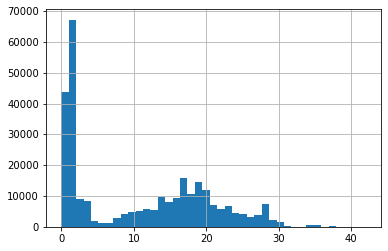

In [18]:
df['QUANTIDADE DE PAVIMENTOS'].hist(bins=len(df['QUANTIDADE DE PAVIMENTOS'].unique()))

Por esse histograma é possível constatar que a imensa maioria dos imóveis da cidade de São Paulo tem menos que cinco pavimentos, com uma predominância de casas térreas e assobradadas.

## Histograma do ano de construção corrigido

In [19]:
df['ANO DA CONSTRUCAO CORRIGIDO'].unique()

array([1989, 1978, 1970, 1939, 1944, 1962, 1952, 1954, 1959, 1971, 1984,
       1975, 1987, 2008, 1949, 1951, 1955, 1977, 2002, 1956, 1994, 1976,
       1967, 2016, 1960, 1964, 1990, 1958, 1969, 2007, 1997, 1985, 2013,
       1950, 1946, 1919, 1934, 1931, 1996, 1972, 2011, 1940, 1929, 1974,
       1986, 1947, 2014, 1968, 1957, 1966,    0, 1991, 1932, 1998, 1963,
       2015, 1999, 1941, 1980, 1982, 2000, 1973, 1942, 1945, 1925, 2019,
       2018, 1961, 1924, 1953, 1981, 2010, 1995, 1993, 1938, 1965, 1992,
       1983, 1979, 1988, 1917, 1930, 1933, 2004, 1943, 1948, 2005, 1936,
       1937, 1935, 1928, 1923, 2006, 2012, 2009, 2001, 2003, 1910, 1926,
       2017, 1927, 1920, 1886, 1922, 1909, 1913, 1908, 1912, 1921])

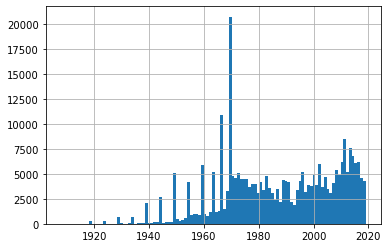

In [20]:
(df['ANO DA CONSTRUCAO CORRIGIDO'][df['ANO DA CONSTRUCAO CORRIGIDO'] > 1900]
 .hist(bins=len(df['ANO DA CONSTRUCAO CORRIGIDO'].unique())))

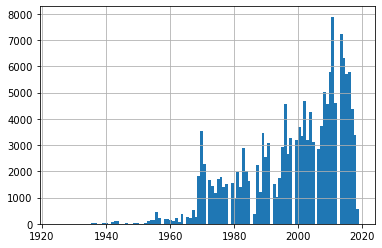

In [21]:
(df['ANO DA CONSTRUCAO CORRIGIDO'][(df['ANO DA CONSTRUCAO CORRIGIDO'] > 1900) & (df['QUANTIDADE DE PAVIMENTOS'] > 5)]
 .hist(bins=len(df['ANO DA CONSTRUCAO CORRIGIDO'].unique())))

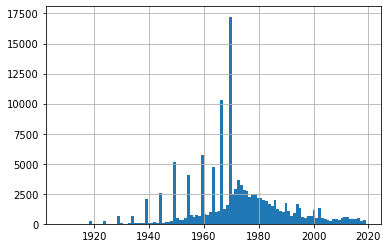

In [22]:
(df['ANO DA CONSTRUCAO CORRIGIDO'][(df['ANO DA CONSTRUCAO CORRIGIDO'] > 1900) & (df['QUANTIDADE DE PAVIMENTOS'] <= 5)]
 .hist(bins=len(df['ANO DA CONSTRUCAO CORRIGIDO'].unique())))

## Espacializando a informação

Para espacializar a informação temos a opção de contrenta-las por quadra fiscal e dessa forma produzir mapas temáticos por um determinado período

In [23]:
df.groupby(['setor', 'quadra']).count()

NUMERO DO CONTRIBUINTE  ANO DO EXERCICIO  NUMERO DA NL  \
setor quadra                                                           
002   001                        233               233           233   
      002                         52                52            52   
      003                         36                36            36   
      004                        136               136           136   
      007                         19                19            19   
...                              ...               ...           ...   
196   033                          8                 8             8   
      034                          1                 1             1   
      035                          1                 1             1   
      036                          8                 8             8   
      037                       1025              1025          1025   

              DATA DO CADASTRAMENTO  TIPO DE CONTRIBUINTE 1  \
setor quadra                                                  
002   001                       233                     231   
      002                        52                      50   
      003                        36                      35   
      004                       136                     134   
      007                        19                      19   
...                             ...                     ...   
196   033                         8                       8   
      034                         1                       1   
      035                         1                       1   
      036                         8                       8   
      037                      1025                    1025   

              CPF/CNPJ DO CONTRIBUINTE 1  NOME DO CONTRIBUINTE 1  \
setor quadra                                                       
002   001                            233                     233   
      002                             52                      52   
      003                             36                      36   
      004                            136                     136   
      007                             19                      19   
...                                  ...                     ...   
196   033                              8                       8   
      034                              1                       1   
      035                              1                       1   
      036                              8                       8   
      037                           1025                    1025   

              TIPO DE CONTRIBUINTE 2  CPF/CNPJ DO CONTRIBUINTE 2  \
setor quadra                                                       
002   001                        135                         233   
      002                          6                          52   
      003                         11                          36   
      004                         26                         136   
      007                          6                          19   
...                              ...                         ...   
196   033                          2                           8   
      034                          0                           1   
      035                          0                           1   
      036                          2                           8   
      037                        734                        1025   

              NOME DO CONTRIBUINTE 2  ...  QUANTIDADE DE PAVIMENTOS  \
setor quadra                          ...                             
002   001                        135  ...                       233   
      002                          6  ...                        52   
      003                         11  ...                        36   
      004                         26  ...                       136   
      007                          6  ...                    

In [24]:
df_contagem_por_quadras = (df[['setor', 'quadra']][df['QUANTIDADE DE PAVIMENTOS'] > 5]
 .groupby(['setor', 'quadra'])
 .size().reset_index(name='unidades_individuais'))

In [25]:
df_contagem_por_quadras

,setor,quadra,unidades_individuais
0,002,001,36
1,002,004,35
2,002,008,24
3,002,022,51
4,002,027,158
...,...,...,...
900,196,012,86
901,196,013,1
902,196,017,301
903,196,018,1858


In [26]:
##TODO fazer merge das quadras fiscais a contagem por quadras e ter a informação espacializada

In [30]:
import numpy as np

In [36]:
pd.pivot_table(df[df['QUANTIDADE DE PAVIMENTOS'] > 5], 
               values='NUMERO DO CONTRIBUINTE', index='setor',
               columns=['ANO DA CONSTRUCAO CORRIGIDO'], aggfunc=np.count_nonzero,
               fill_value=0)

ANO DA CONSTRUCAO CORRIGIDO,1924,1934,1935,1936,1937,1939,1940,1942,1943,1944,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
setor,,,,,,,,,,,,,,,,,,,,,
002,1,1,1,22,38,12,33,59,1,78,...,0,1,0,260,352,181,0,0,277,0
003,0,1,0,0,0,0,0,0,118,26,...,0,0,0,0,0,662,292,670,0,396
004,0,0,0,0,0,0,0,0,0,0,...,0,0,494,1,152,532,319,199,267,0
017,0,0,0,0,0,0,0,0,0,0,...,0,1,298,297,5,0,180,0,0,0
018,0,0,0,0,0,0,0,0,0,0,...,220,1,0,0,2,0,1,181,0,0
025,0,0,0,0,0,1,0,0,0,1,...,0,3,1,2,0,0,0,1,0,0
026,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,44,1,300,0,0,0
027,0,0,0,0,0,0,0,0,0,0,...,932,743,0,325,153,0,244,351,72,0
028,0,0,0,0,0,0,0,0,0,0,...,191,410,0,626,1023,274,121,52,0,0
